In [15]:
#Code partially borrowed with permission from Brent Komer and Ivana Kajic

#press Shift+Enter to run kernel
#press dd outside of cell to delete (very dangerous be careful!!!!)
#dir(Display) #directory of functions that can be used on variable (in this case Display)

import matplotlib.pyplot as plt
import nengo_spa as spa #imports Semantic Pointer Architecture
#import nengo.spa as spa #imports Semantic Pointer Architecture: old SPA 
import seaborn as sns
import pickle
import numpy as np #Numpy is life, can't do math without it
#import python_utils as utils

#special functions created by Nengo users to help with spatial semantic pointers
#from utils import encode_point, make_good_unitary, get_heatmap_vectors #for old spa
from utils import encode_point, make_good_unitary, get_heatmap_vectors, spatial_dot
import os
#import pygame
import string #to create list of letters
#plots images into Jupyter notebook
%matplotlib inline

In [4]:
with open('d_chars.pkl', 'rb') as f: #open files with only one rgb channel 
    d_chars_compact = pickle.load(f)
    
with open('d_chars_full.pkl', 'rb') as f: #open files with all rgb channels
    d_chars_full = pickle.load(f)

In [18]:
d_chars_normalized = d_chars_compact.copy()
d_chars_vectors = d_chars_compact.copy()

(100, 100)


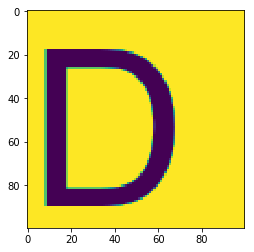

In [19]:
print(d_chars_compact['A'].shape)
plt.imshow(d_chars_compact['D'])
#plt.imshow(d_chars_full['A'])
#plt.imshow(d_chars_compact['A'])

In [20]:
from numpy.random import shuffle
from numpy.random import seed

digits =list(map(str,np.arange(1,10)))   #creates list of digits
letters = list(string.ascii_uppercase)   #creates list of letters
#print(digits)
#print(letters)
removedLetters = ['I','O','Q','S','Z'] #list of letters not used in O'Donnell & Wyble (in Prep)
list(map(letters.remove, removedLetters))  #removes letters not used in O'Donnell & Wyble (in Prep)


[None, None, None, None, None]

In [21]:
characters = []
characters.extend(letters)
characters.extend(digits)
print(characters)

num_chars = len(characters)
chars_matrix = []

#flattens matrix
for i in range(num_chars):
    d_chars_normalized[characters[i]] = (127-d_chars_compact[characters[i]])/127
    d_chars_normalized[characters[i]] = d_chars_normalized[characters[i]]/np.sum(d_chars_normalized[characters[i]]*d_chars_normalized[characters[i]])

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'R', 'T', 'U', 'V', 'W', 'X', 'Y', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [22]:
dim = 512  #Dimensions of vectors for pixel "in depth"

X = make_good_unitary(dim) #creates semantic pointers along the x axis with dim dimensions (512)
Y = make_good_unitary(dim) #creates semantic pointers along the y axis with dim dimensions (512)

dot = np.dot(X.v, Y.v) #takes dot product of vectors of semantic points

while dot > 0.05:  #control while loop to make x and y more orthogonal
    X = make_good_unitary(dim)
    dot = np.dot(X.v, Y.v)

In [32]:
def convert_pixels(img, X, Y, spa_range = (-5,5)):
    size = spa_range[1]-spa_range[0]
    l, w = img.shape
    spa = np.zeros_like(X.v)
    for i in range(l):
        for j in range(w):
            if img[i,j] > 0:
                spa += encode_point(i*size/l+spa_range[0],j*size/w+spa_range[0],X,Y).v * img[i,j]
    return spa

In [36]:
for i in range(num_chars):
    d_chars_vectors[characters[i]] = convert_pixels(d_chars_normalized[characters[i]], X, Y, spa_range=(-5,5))

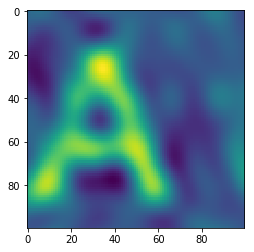

In [35]:
plt.imshow(spatial_dot(convert_pixels((127-d_chars_compact[characters[0]])/127, X, Y, spa_range=(-5,5)), np.linspace(-5,5,100),np.linspace(-5,5,100), X, Y, swap = True))

In [37]:
#ONLY RUN ONCE

shuffle(letters)

In [39]:

image_x = 100*2
image_y = 100*2
font_size = 100

seed = 13  
limit = 5  #bound of cartesian space
res = image_x #resolution of image, currently set to be size of image itself

vmin=-1
vmax=1
cmap='plasma'

xs = np.linspace(-limit, limit, res) #generates x axis from -5:5
ys = np.linspace(-limit, limit, res) #generates y axis from -5:5

In [40]:
from PIL import Image, ImageDraw, ImageFont #Creates display used in experiment

shuffle(digits)
Stimuli = ['5','7','C','3']
#Stimuli = [letters[0],digits[0],digits[1],digits[2]]
#shuffle(Stimuli) #randomizes where stimuli go on screen
print(Stimuli) #checks to confirm stims should go in right location


TopLeft_Loc = (image_x/4-font_size/2,(image_y/4-font_size/2)) 
TopRight_Loc =(image_x*.75-font_size/2,image_y/4-font_size/2)  
BottomLeft_Loc =(image_x/4-font_size/2,image_y*.75-font_size/2) 
BottomRight_Loc = (image_x*.75-font_size/2,image_y*.75-font_size/2)

Display = Image.new('RGB', (image_x, image_y), color = (127,127,127))
fnt = ImageFont.truetype('arial.ttf',font_size)

#FixCross = ImageDraw.Draw(Display)
TopLeft = ImageDraw.Draw(Display)
TopRight = ImageDraw.Draw(Display)
BottomRight = ImageDraw.Draw(Display)
BottomLeft = ImageDraw.Draw(Display)


#FixCross.text(((image_x/2-font_size/2),(image_y/2-font_size/2)), "+",font=fnt, fill=(0,0,0))
TopLeft.text((image_x/4-font_size/2,(image_y/4-font_size/2)), Stimuli[0],font=fnt, fill=(0,0,0))
TopRight.text((image_x*.75-font_size/2,image_y/4-font_size/2), Stimuli[1],font=fnt,fill=(0,0,0))
BottomLeft.text((image_x/4-font_size/2,image_y*.75-font_size/2), Stimuli[2],font=fnt,fill=(0,0,0))
BottomRight.text((image_x*.75-font_size/2,image_y*.75-font_size/2), Stimuli[3],font=fnt,fill=(0,0,0))


#Display.save('pil_fixCross4.png') saves image as png (not necessary right now)


['5', '7', 'C', '3']


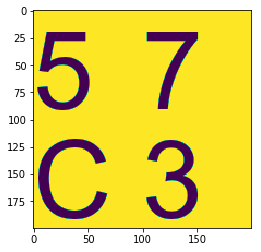

In [42]:
arr = np.array(Display) #converts display to array
plt.imshow(arr[:,:,0]) #displays image as array

In [45]:
arr_normalized = 127-arr[:,:,0]
arr_normalized = arr_normalized/(np.sum(arr_normalized*arr_normalized))

In [46]:
arr_vector = convert_pixels(arr_normalized, X, Y, spa_range=(-10,10))

In [54]:
scanforC = spa.SemanticPointer(arr_vector) * ~ spa.SemanticPointer(d_chars_vectors['C'])

In [55]:
heatmap = spatial_dot(scanforC, np.linspace(-10,10,100), np.linspace(-10,10,100), X, Y, swap=True)

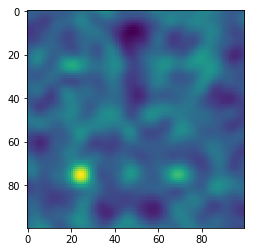

In [56]:
plt.imshow(heatmap)